# Predicting stock prices using MLP and LSTM models

Candidate numbers: 26250, 31040

### 1.0 Introduction

The task of predicting stock market prices is challenging. Stock prediction is of interest to most investors due to its high volatility. Even now, some investors use a combination of technical and fundamental analysis to help them make better decisions about their equity market investments. 

A couple of previous studies have compared linear regression models to artificial neural networks (ANN) and showed that ANNs yielded a much higher profit. The main difference in this observation is that ANNs can identify non-linear patterns. The chaotic and non-linear nature of the stock markets makes ANNs more popular for predictions. In particular, the multilayer perceptron (MLP) and recurrent neural network (RNN) models are known for their reliability in analysing and processing sequential data like time series data. When we deal with predicting stock market prices, we are also dealing with time-series data. Long short-term memory networks (LSTM) are a recent popular RNN architecture choice due to their sophisticated transformation of inputs. 

Therefore, for this project, we've decided to investigate various ANN models and compare them to see which has the best performance. In particular, we will look at all the popular architectures mentioned before: Multi-layer perceptron, recurrent neural networks, and long short-term memory RNNs. 

### 2.0 Dataset

#### 2.1 Data properties

For this project, we've decided to use Meta's stock prices as our dataset. Meta’s stock prices are particularly of interest because of the fluctuations for various reasons such as COVID-19, competition, falling user base etc. Given that Meta is a popular investment choice for investors, we would like to find out if it’s worthwhile for new investors to do the same. 

A brief description of the variables in our dataset is below:

**Date**: The specific date that corresponds to the data entry.

**Open**: The opening price of Meta on a particular day.

**Low**: The lowest price that the Meta stock fell to on a particular day.

**High**: The highest price that the Meta stock rose to on a particular day.

**Close**: The closing price of Meta on a particular day.

**Adj Close**: The closing price of Meta on a particular day adjusted for other corporate actions such as dividends.

**Volume**: The number of Meta shares traded on a particular day.

Before we used the dataset, we carried some data cleaning processes and exploratory data analysis. 

| **Parameters** | **Open** | **High** | **Low** | **Close** | **Volume** |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | 
| Mean | 147.09 | 148.86 | 145.30 | 147.13 | 30907570.43 |
| Variance | 8040.69 | 8240.13 | 7851.26 | 8047.79 | 756223607983277.9 |
| Minimum | 18.08 | 18.27 | 17.55 | 17.73 | 5913100 |
| Maximum | 381.68 | 384.33 | 378.81 | 382.18 | 573576400 |
| Skewness | 0.595 | 0.597 | 0.594 | 0.594 | 5.85 |
| Kurtosis | -0.34 | -0.34 | -0.33 | -0.34 | 77.21 |

As we can see, the statistics for the price variables are similar which is to be expected. There is a large amount of variance as well which we would expect from stock data. The closing price is the last price at which the stock is traded for the day. There is a large amount of variance in volume as well due to the difference in the number of stocks being traded each day. We can use the closing price of each day to be the value we are trying to predict. This essentially means that the closing prices will be our targets in the models later on. Additionally from our analysis, we decided that for this project, including the entire date range will be beneficial. This is because there is a variation in patterns across the years. All of it can be taken into account when training our models rather than taking a subset range of dates.

#### 2.2 Data preprocessing

Before building some of our models and inserting data, we pre-processed our dataset. This procedure was carried out to improve the backpropagation dynamic. All ANN models follow a similar process. First, we forward-propagate the model. When we do this, we extract the weighted sum of inputs in each neuron and plug our inputs into the activation functions. Once the forward-propagation is complete, we carry out back-propagation to tune the weights to their correct values which are calculated by an optimisation function. Once the loss has been calculated for each neuron, we can update the weights. Following this explanation, we have to pre-process the data to help the optimisation function calculations. If we do not normalise the inputs, the optimisation function may minimise some weights faster than others. This process of updating weights is not ideal. By normalising the data to take values between [-1, 1], the network's learning treats all inputs to a similar extent which in turn, improves learning. We also normalised data to fall between [0, 1] for some models, but there have been studies that indicate that the [-1, 1] range performs better through the comparison of tanh and sigmoid functions.

### 3.0 Methodology

#### 3.1 Multilayer perceptron model (Model 1)

The first model is a multilayer perceptron model. In this model, we use the opening, highest, lowest price, and volume of Meta stocks to predict the closing price on the same day. This model has four inputs, one hidden layer, an adjustable number of neurons in the hidden layer, and one output layer. Figure 3.1.1 represents this straightforward model.

|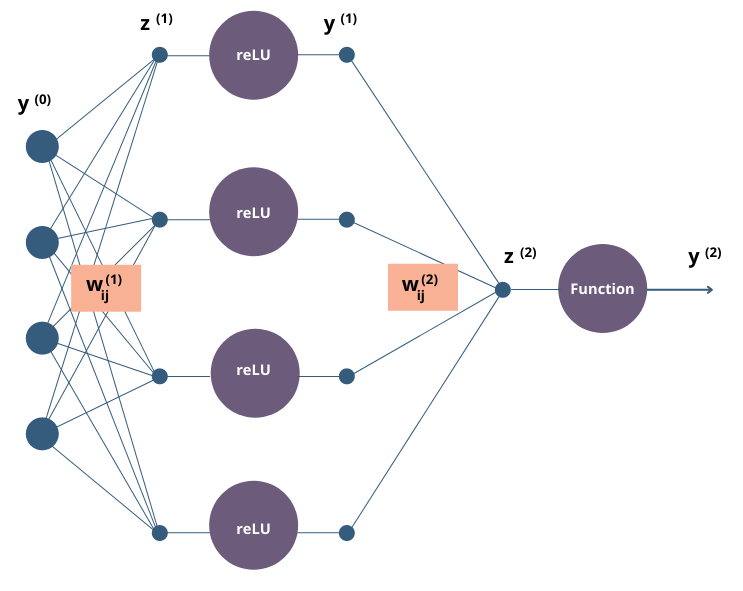|
|:--:| 
| *figure 3.1.1* |

The most basic multilayer perceptron consists of three components - an input layer, one hidden layer, and an output layer. The number of hidden layers can be altered depending on the complexity of the task being done. The main reason why MLPs are preferred over single-layer perceptron algorithms is their ability to perform tasks on data that is non linearly separable. MLPs also use non-linear activation functions such as sigmoid, tanh, and reLU which we used in our models. MLPs are trained using the backpropagation process which is discussed below.

Before we discuss the forward and backward propagation process, we have to define some features using figure 3.1.1. In the figure, the input layer corresponds to $y^{(0)}$, the inputs for the hidden layer are represented by $z^{(1)}$, and the output after the relu function is $y^{(1)}$. Following the hidden layer, the input before the output layer is $z_{(2)}$, and the final output is $y^{(2)}$. The last thing we need to define is the weights. The weights for the inputs between the input and hidden layers can be defined as $w_{ij}^{(1)}$ where i is the i-th input, and j is the jth neuron in the hidden layer. A similar concept follows for the weights between the hidden and output layer, only this time, the weights are denoted by $w_{ij}^{(2)}$.

For this model specifically, the forward propagation aims to calculate the output of the model given our inputs. Based on figure 3.1.1, again, we are most interested in finding $z^{(2)}$ (the input for the output layer) to compute $y^{(2)}$ (the output). To find $z^{(2)}$, we need to find out the values of $y^{(1)}$, and to compute $y^{(1)}$, we would need the values of $y^{(0)}$. To do so, we multiply the weights of the current layer and the output from the previous layer. We can express the multiplication this way:

$$ z^{(2)} = w_{ij}^{(2)}y^{(1)} + w_{ij}^{(2)}y^{(0)}$$

Now that the input of the output layer has been calculated, we can just pass the input through the output layer's function to obtain our final output, $y^{(2)}$.

$$ y^{(2)} = f_{k}(z^{(2)})$$

For a more generalised case, we can use the same concept above to write equations for models with $k$ number of layers. This is especially useful for the next MLP model in section 3.2. The expressions can be found below:

$$ z^{(k)} = \sum_i w_{ij}^{(k)}y^{(k-1)}$$ and $$ y^{(k)} = f_{k}(z^{(k)}).$$

The backward propagation process is a little more complicated. The backprop process aims to update the weights for each neuron. It updates the model by finding the derivatives. This time, we start off knowing the error term, $E$, which is calculated from our output. To update each neuron, we would have to calculate the partial derivatives for each neuron that contributed to the error term. In our case, $y^{(2)}$ had a direct impact on our error term. Following that, $z^{(2)}$ was involved in the calculation of $y^{(2)}$. Next, $y_{i}^{(1)}$ was involved in the calculation of $z^{(2)}$ and the pattern continues. Therefore, we need to find the partial derivates concerning all of these variables. The explanation can be summarised with this generalised expression:

$$ \frac{\partial E}{\partial z_{i}^{k}} =   \sum_i\frac{\partial{E}}{\partial{y_{i}^{(k)}}}\frac{\partial{y_{i}^{k}}}{\partial{z_{i}^{k}}}$$ 

The last thing to note about the MLP models is that we decided to use fully-connected or linear layers, along with the reLU activation function. Although our models are simple, we found that fully connected layers would serve our model better. The main reason for this is that fully connected layers would update all the weights in back-propagation since all neurons are connected. As for our activation function (AF) choice, we identified the advantages and limitations of AFs before deciding on the reLU function. A major downside of the reLU function is that it can't update weights during the backpropagation if its inputs are negative. Fortunately for our case, stock prices can be low, but they will never be in the negative range. The main advantage of the reLU function is that it accelerates the convergence of stochastic gradient descent as compared to functions like sigmoid and tanh. 

#### 3.2 Multilayer perceptron model with the sliding window method (Model 2)

As an investor, predicting the closing price given today's information is only helpful for traders who buy and sell on the same day. But we want to predict prices over a longer period, therefore, our previous model isn't very useful.

A good model should use the stock's past information to predict today's price. For starters, we can try to use the closing price of Meta in the last $t-1$ days to predict the closing price on the $t$-th day. We've decided to use the closing price of the last 14 days to predict the price on the day after the 14 days. Therefore, the second MLP model will have 14 inputs. This model aims to predict the closing price given the prices of the last 14 days. We can achieve this goal by using the sliding window method.

*Sliding window method:* We explained the rough idea of a sliding window above. The sliding window method works by taking a window of a set size. For example, let's assume we have a dataset of $[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]$ and a window size of five. We could make the following datasets using the window:$[1, 2, 3, 4, 5]$, $[2, 3, 4, 5, 6]$, $[3, 4, 5, 6, 7]$ etc. This pattern continues until we reach the end of the dataset. This method essentially slides the window to create subsets of our original dataset. We can apply this to our Meta dataset to generate 14-day inputs.

Looking back at figure 3.1.1, the only difference between the first and second models is the number of inputs. The forward propagation and backward propagation process for this model remain the same. We can apply the generalised processes in section 3.1 to this model. 

Most of the process remains the same from the first model. We use a function that splits our dataset into 14-day input data with the 15th day being the output term. We then transform the variables into tensors and apply the previous MLP training loop used for the first model. We also transposed our data, so that it was comparable to the data we used for our initial model. 

The last additional feature we added to this model is a dropout layer. Upon running the model on the first try with the new sliding window data, we found that the model performed poorly with the test data but well with the train data. This may be because of overfitting. As a result, we chose to add a dropout layer to the model. Dropout is a process of randomly zeroing out neurons in a layer during the training process. This helps to reduce overfitting in the model as the codependence of individual neurons is reduced. Typically, dropout is only done during the training process and is removed at the testing stage.

#### 3.3 Recurrent neural network (RNN) model with the sliding window method (Model 3)

For our third model, we've built a simple recurrent neural network model using the sliding window method to predict prices. The main difference between the RNN and MLP models is that RNNs have an extra hidden state. 

Figure 3.3.1 shows the structure of our RNN model.

|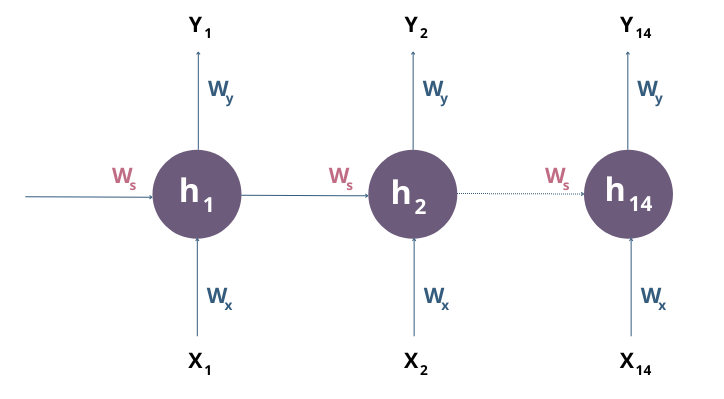|
|:--:| 
| *figure 3.3.1* |

To break down how our RNN model works, we can take an example of one subset of our data. We have 0 to 14 day inputs, $P =$ {$p_{0},...,p_{14}$}. We feed the RNN model these inputs one by one, and it produces a hidden state for each input. We then feed the current input, $p_{t}$, and the hidden state from the previous input, $h_{t-1}$, to create the next hidden state, $h_{t}$. We can represent the hidden state at time t with the following expression: 

$$h_{t} = RNN(p_{t}, h_{t-1}) $$.

For the forward computation in the RNN model, we use both the input, $X_{t}$, and the hidden state at the previous time, $h_{t-1}$. The hidden state of the current block, or the block at time $t$ can be found by adding the products of the previous hidden state, $h_{t-1}$ and the weight, $W_{s}$ associated with it, and the current input and its respective weight, $W_{x}$. This product is then passed onto the tanh activation function to generate the new hidden state. We can write the expression like this:

$$h_{t} = tanh(W_{x}X_{t} + W_{s}h_{t-1})$$

After we have calculated the hidden state of the current block, we pass this state multiplied by its weights through the tanh activation function to generate our output.

$$Y_{t} = tanh(W_{y}h_{t}).$$

The RNN functions quite differently from the MLP models in terms of its backprop process. We will look at the backprop in detail because it is important to understand why LSTM networks tend to perform better than RNNs. Before we do, we will define our error term as $E_{t} = (a_{t} -  Y_{t})^2$ where $a_{t}$ is the desired output and $Y_{t}$ is the predicted output. For a simple explanation, we can assume that our end output is $Y_{2}$ in figure 3.3.1 and we will now show how the new output weight, $W_{Y}$, is updated. The error term at the final output, $E_{2}$, was derived from the output, $Y_{2}$ and the output was derived from the output weight, $W_{Y}$. So to find the derivative of the error term with respect to $W_{Y}$, we can use the following:

$$ \frac{\partial E_{2}}{\partial W_{Y}} =  \frac{\partial{E}}{\partial{Y_{2}}}\frac{\partial{Y_{2}}}{\partial{W_{Y}}}$$ 


As for the new weights of the hidden states, $W_{s}$, we need to refer back to the error term. Notice that $E_{2}$ is a function of the output, $Y_{2}$ assuming again that this is the final output of the model. $Y_{2}$ is also a function of the hidden state, $h_{2}$, and $h_{2}$ is a function of $W_{s}$ therefore we have to find the partial derivatives with respect to all of these variables tracing back to the very first input of the model. To generalise this process, we can represent it with the following expression:

$$ \frac{\partial E_{2}}{\partial W_{s}} =   (\frac{\partial{E_{2}}}{\partial{Y_{2}}}\frac{\partial{Y_{2}}}{\partial{h_{2}}}\frac{\partial{h_{2}}}{\partial{W_{s}}}) + (\frac{\partial{E_{2}}}{\partial{Y_{2}}}\frac{\partial{Y_{2}}}{\partial{h_{2}}}\frac{\partial{h_{2}}}{\partial{h_{1}}}\frac{\partial{h_{2}}}{\partial{W_{s}}})$$ 

And lastly, the input weights, $W_{x}$. We update them with a similar logic to the updates of $W_{s}$. We can again represent the generalised process with the following expression:

$$ \frac{\partial E_{2}}{\partial W_{x}} =   (\frac{\partial{E_{2}}}{\partial{Y_{2}}}\frac{\partial{Y_{2}}}{\partial{h_{2}}}\frac{\partial{h_{2}}}{\partial{W_{x}}}) + (\frac{\partial{E_{2}}}{\partial{Y_{2}}}\frac{\partial{Y_{2}}}{\partial{h_{2}}}\frac{\partial{h_{2}}}{\partial{h_{1}}}\frac{\partial{h_{2}}}{\partial{W_{x}}})$$ 

The RNN model was built along the idea explained above with similar parameters to the MLP models. The RNN model we built had one input layer, one hidden layer, and one output layer. Apart from that, we fed inputs into the model using the sliding window method of 14-day intervals. 

By observation, we can infer that the sum of the backprop partial derivatives will be huge for our model since we have 14 inputs. We will talk about why this is a problem in the next section (section 3.4) when we design the LSTM model.

The last thing to note is that in the RNN model, we decided to use the Adam optimiser function instead of SGD to experiment since there isn't a set standard. 

#### 3.4 LSTM model with the sliding window method (Model 4)

Before we build our LSTM network, we need to explore recurrent neural networks (RNN) further. LSTM networks are an extension built to solve one of the limitations of RNNs. 

An RNN functions similarly to the way a human does. Humans learn new things based on their previous knowledge. They don't think from scratch in every instance. Using this example, RNNs address this memory issue by storing information about the past. This RNN feature makes it useful for stock market predictions. In technical analysis of stocks, we use past information on stocks like their opening, closing prices, volumes etc. In an RNN model, we can take information at time $t-1$ and concatenate it to our input at time $t$ to predict the stock's price at time $t+1$. 

However, the limitation of RNNs is their vanishing gradient problem. As explained earlier, RNNs retain all information from the past. If we refer back to figure 3.3.1, every single neuron in the model has contributed to the output. When the model is updated, it would have to propagate back through all these neurons. We explained that the backprop process in section 3.3 can be huge if we have more inputs. In particular, if we had to backprop for more than 10 weights, we can see that as we multiply the gradients, they progressively become smaller as they reach the beginning of the model. As the gradients become smaller, the weights towards the beginning of the model receive little to no updates. This phenomenon is referred to as the vanishing gradient problem.

LSTM solves the vanishing gradient problem of RNNs. We'll be using the nn.LSTM class to construct our LSTM model. The nn.LSTM class applies a sequence to our inputs. This sequence falls into each block of the RNN model. We can look at figure 3.4.1 below to visualise the sequence of one block.

|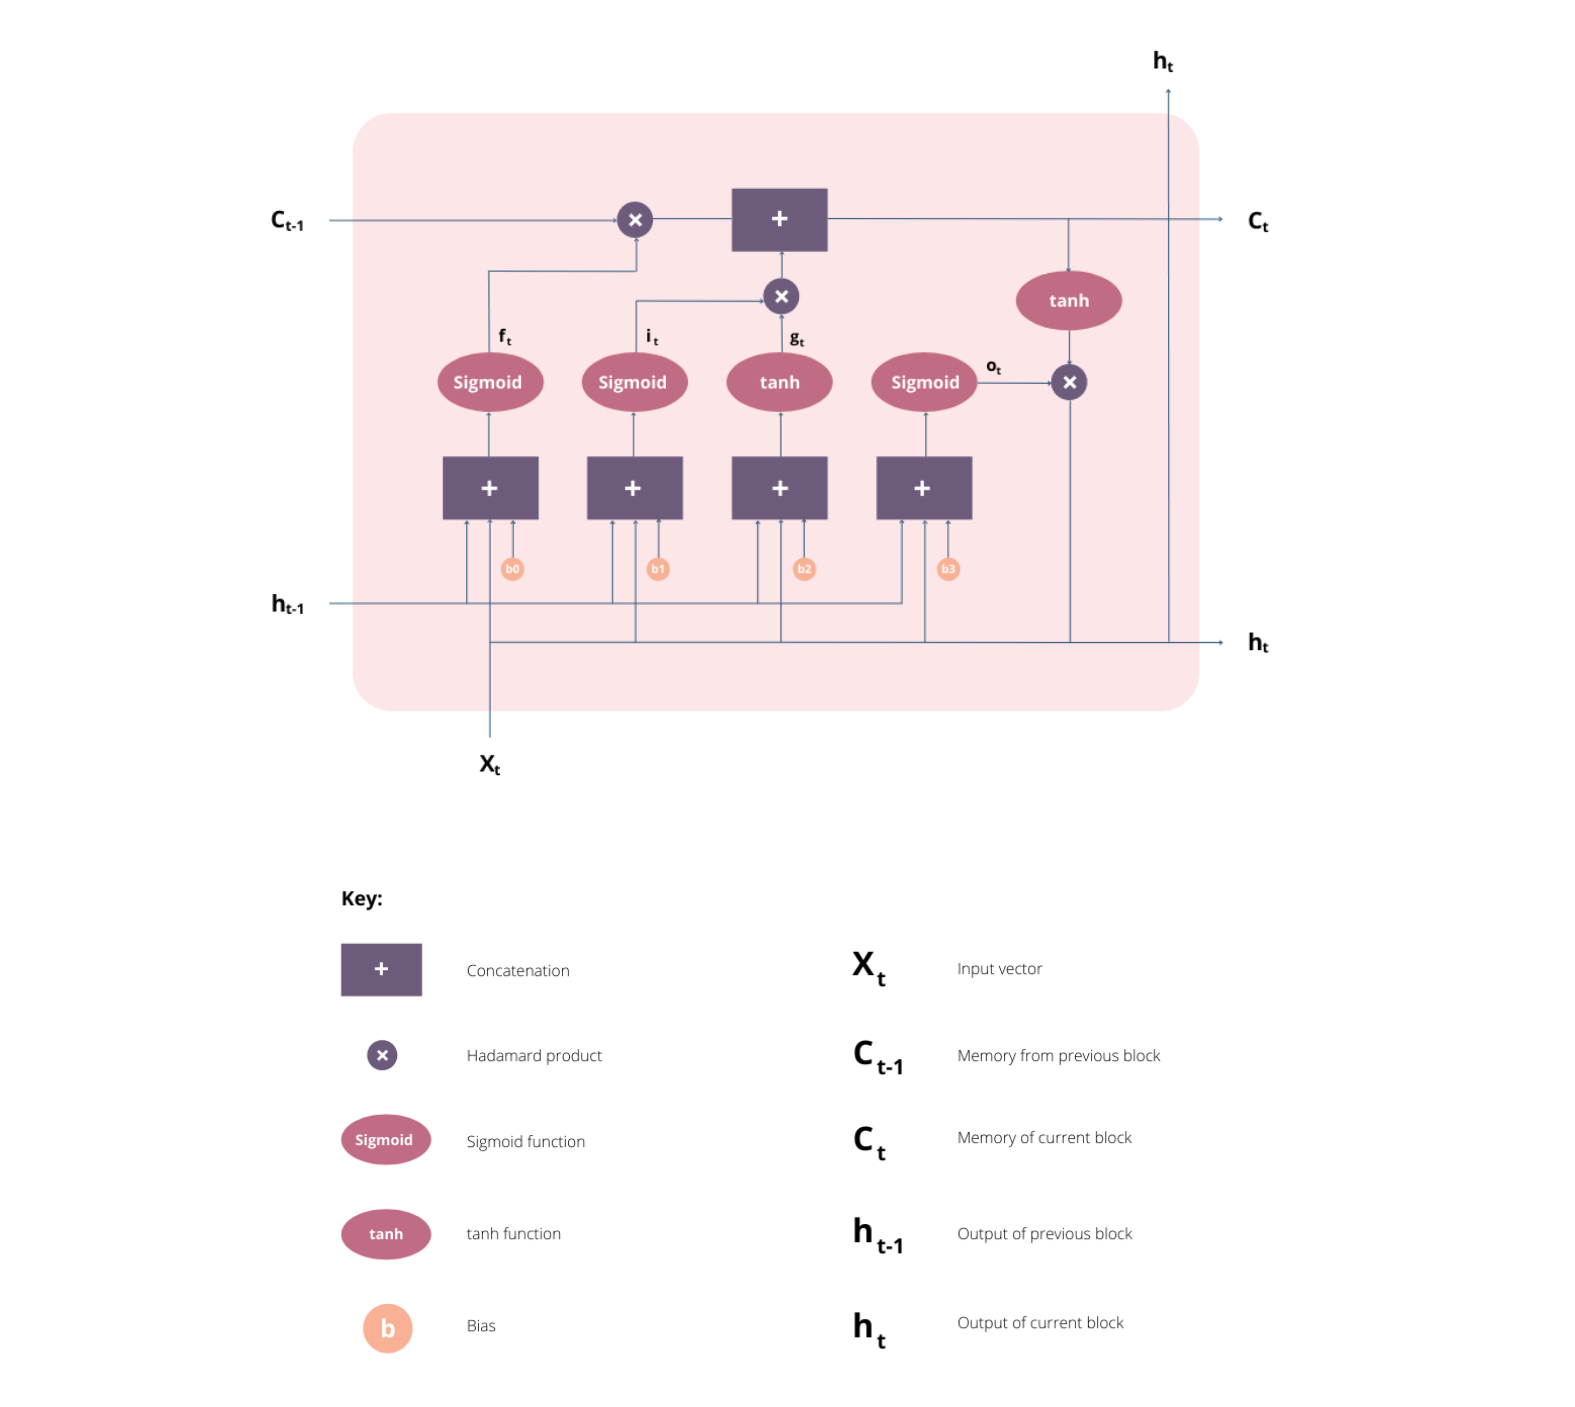|
|:--:| 
| *figure 3.4.1* |

There are three gates in the LSTM sequence we're using. The three gates are the input, forget and output gates. All these gates are present in each block. There are respective blocks for each timeframe. The general idea of the LSTM sequence is to use these three gates to process the inputs, calculate the memory (information that is relevant to retain), and then output relevant information and information about memory to pass onto the next block. Before we explain how the function of the gates, we should define the cell state and the output. The cell state and the output is the result of the LSTM sequence. We denote the cell state at time $t$ by $C_{t}$. The cell state stores the memory of the current block. The memory contains information about what information is significant. Each block has a respective cell state, and it is useful because we have information from the earliest and latest inputs. In comparison to the RNN model, each cell state holds separate information rather than accumulated information. The output of the block at time $t$, which we denote by $h_{t}$, is the final information that is relevant. The rest of the irrelevant information will be filtered out through the gates.

**Input gate**

To start off, we can explore the input gate. The input gate can be split into two parts. We can refer to the first part as the input gate layer. The input gate layer decides what values from the inputs from the previous block should be updated. This process can be denoted by:

$$i_{t} = \sigma(W_{ii}X_{t} + W_{hi}h_{t-1} + b_{i})$$

where $\sigma$ is the sigmoid function, $W_{ii}$ are the weights for the input at time $t$, $X_{t}$ are the inputs at time $t$ (the current block), $W_{hi}$ are the weights for the output in the previous block, $h_{t-1}$, and $b_{i}$ is the bias for the input gate layer. By feeding the inputs and hidden state values through the sigmoid function, we produce the values that have to be updated, $i_{t}$, from the input of this block, $X_{t}$. 


In the second part of the input gate, we produce a function that finds all the values from the inputs. This function can be written as the following:

$$g_{t} = tanh(W_{ig}X_{t} + W_{hg}h_{t-1} + b_{g})$$

where $\tanh$ is the tanh function, $W_{ig}$ are the weights for the input at time $t$, $W_{hg}$ are the weights for the output in the previous block, and $b_{g}$ is the bias for this layer. We then obtain the product of these two parts ($g_{t} \odot i_{t}$) to update the cell state of the current block. The product of both includes updated values along with new values from the input. This update essentially contains all the new information about this block.

**Forget gate**

The forget gate takes the input for the current block, $X_{t}$ combined with the hidden state of the previous block, $h_{t-1}$. We squish these combined factors into the sigmoid function that returns a value between 0 and 1. A value closer to 0 indicates that we do not need to keep a lot of information from this state because it is unimportant, while a value closer to 1 indicates the opposite. We use the value from the sigmoid function to decide what information we should throw away in this cell state. The above explanation can be denoted by the following expression: 

$$f_{t} = \sigma(W_{ii}X_{t} + W_{hi}h_{t-1} + b_{f})$$

where $W_{ii}$ are the weights for the input at time $t$, $X_{t}$ are the inputs at time $t$, $h_{t-1}$ is the output of the block at time $t - 1$, $W_{hi}$ are the weights for the output, $h_{t-1}$, and $b_{hi}$ and $b_{ii}$ are the biases from the hidden state, $h_{t-1}$ and input, $X_{t}$ respectively that is fed into the sigmoid function. 

The forget gate plays its role when we're calculating which memory to retain from the previous block i.e. $C_{t-1}$. To recap, $f_{t}$ contains information about the previous block and $g_{t} \odot i_{t}$ contains all the new information about the current block. We add them together to find the cell state of the current block, $C_{t}$. The cell state of the current block can be calculated as follows:

$$C_{t} = f_{t} \odot C_{t-1} + i_{t} \odot g_{t}$$

where $C_{t-1}$ is the cell state or memory from the previous block and $\odot$ is the Hadamard product. 

**Output gate**

For the output gate, we need to use information from the cell state to decide what to output. The cell state includes all the information about this block whereas, the output will be a filtered version of the cell state. Similar to the input gate, we can split the output gate process into two parts. 

In the first section, we run the inputs and outputs of the previous block through a sigmoid function that decides which parts of the cell state we're going to output:

$$o_{t} = \sigma(W_{io}X_{t} + W_{ho}h_{t-1} + b_{o})$$

In the next section of the output gate, we pass through all the cell state values through a tanh function to obtain values between -1 and 1 only. We then multiply both of these sections to obtain the relevant information that the next block will need. We can now finalise the output with this expression:

$$h_{t} = o_{t} \odot tanh(c_{t})$$

where $o_{t}$ is the first section of the output gate, and $tanh(c_{t})$ represents the second section of the output gate where we pushed through the cell state values in the tanh function.

The idea for the LSTM model is to implement this entire sequence to calculate each hidden state of the RNN model we built before. We built this model with the same idea as the vanilla RNN model in section 3.3, only this time, each block contained the LSTM sequence. Similar to all the previous models, the LSTM model also had one input layer, one hidden layer, and an output layer and the inputs fed into this model followed the sliding window method.

### 4.0 Results

Now that the models are built, we can test their performances. To do so, we used the root-mean-squared error (RMSE) metric to measure performance. Stock prediction is a regression problem rather than a classification problem, therefore, RMSE is the most suitable metric compared to confusion matrices. The RMSE is a measure of standard deviation of the prediction errors, therefore, a smaller RMSE indicates better performance. When we built our models, we had base parameters which we only altered later on. In figure 4.1.1 below, the key for the base parameters is as follows:
* hn: Number of neurons in the hidden layer
* e: Number of epochs taken to train the model
* lr: The learning rate that the model learns at
* w: The sliding window size
* bs: The batch size of the dataset

| **Model** | Base parameters | Training RMSE | Testing RMSE | 
| ----------- | ----------- | ----------- | ----------- | 
| **MLP1** | hn = 4, e = 100, lr = 0.01, w = 1  | 48.4 | 50.7 |
| **MLP2** | hn = 4, e = 100, lr = 0.01, w = 14 | 59.22 | 172.2 | 
| **RNN** | hn = 4, e = 100, lr = 0.01, w = 14 | 0.99 | 1.53 | 
| **LSTM** | hn = 4, e = 100, lr = 0.01, w = 14  | 0.94 | 1.50 | 

Based on the results, these parameters may not be the best fit for our models. In figure 4.1.2, we listed out all the possible combinations of parameters of our models. We decided to experiment with the epochs, learning rates, window size, batch size, dropout probability, and neurons in hidden layers parameters. 

| Parameters | MLP1 | MLP2 | RNN | LSTM |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Number of hidden layers | 1 | 1 | 1 | 1
| Number of neurons in the hidden layers | 4, 10, 32 | 4, 10, 32 | 4, 10, 32 | 4, 10, 32 |
| Epochs | 1, 5, 25, 100 | 1, 5, 25, 100 | 1, 5, 25, 100 | 1, 5, 25, 100 |
| Learning rate | 0.01, 0.1, 0.5 | 0.01, 0.1, 0.5 | 0.01, 0.1, 0.5 | 0.01, 0.1, 0.5 |
| Optimiser | SGD | SGD | Adam | Adam |
| Loss function | MSE | MSE | MSE | MSE |
| Window size | 1 | 7, 14, 30| 1, 7, 14, 30 | 1, 7, 14, 30 |
| Activation function | Relu | Relu | tanh | tanh |
| Batch size | 1| 1 | 1 | 1 |
| Dropout probability | 0.0 | 0.2, 0.5, 0.8 | 0.0 | 0.0 |

While experimenting with different parameters, we prioritised the testing RMSE score over the training RMSE. This is particularly because models can learn training data extremely well, to the point that it overfits. Once the model perfectly learns the training data, it performs poorly with data it has never seen before (i.e. our testing data). Fig 4.1.3 displays the new parameters that have given the lowest testing RMSE score.

| **Model** | New parameters | Training RMSE | Testing RMSE | 
| ----------- | ----------- | ----------- | ----------- | 
| **MLP1** | hn = 4, e = 100, lr = 0.5, w = 1  | 2.84 | 6.24 |
| **MLP2** | hn = 4, e = 100, lr = 0.5, w = 30 | 24.82 | 75.08 | 
| **RNN** | hn = 4, e = 100, lr = 0.1, w = 14 | 0.85 | 1.39 | 
| **LSTM** | hn = 10, e = 100, lr = 0.1, w = 14  | 0.69 | 1.20 | 

As we experimented with the parameters, we found that increasing the sliding window size caused all the models to perform worse. The RNN model in particular reacted the worst to the increased window size. 

It was unexpected to see that our second MLP model performed extremely poorly compared to the other models. We also found that a higher learning rate of 0.1 - 0.5 performed much better than our initial assumption of 0.01. However, any learning rates above this range struggled to converge.

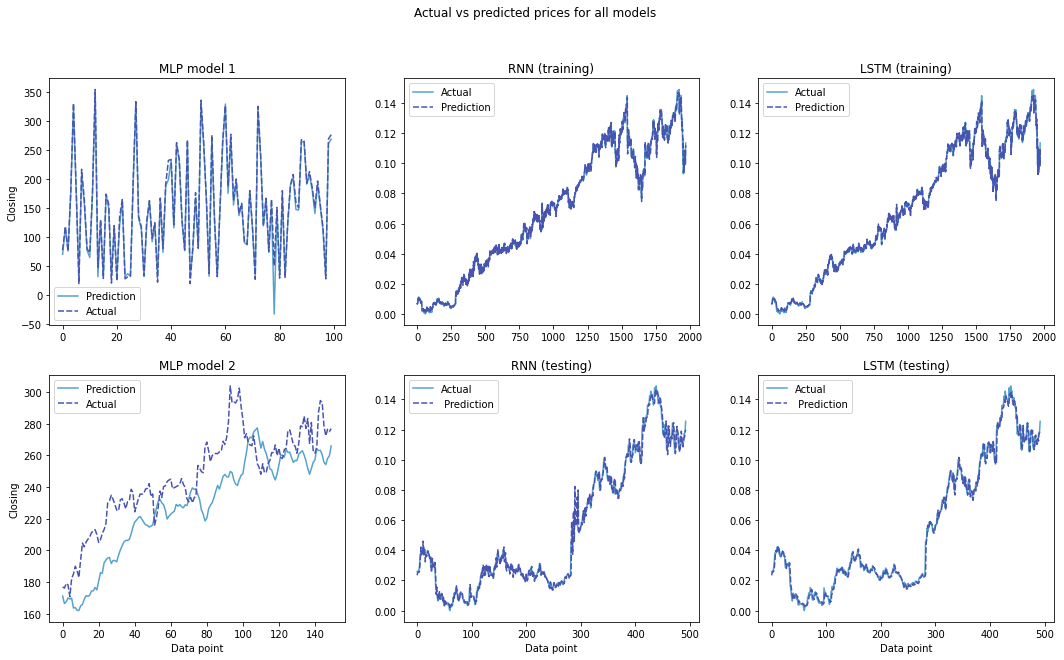

To conclude the results section, figure 4.1.4 shows plots for the predicted versus actual prices for all our models.

We can make some comments based on the visual plots. 

The MLP model 2 performed the worst. It identified increasing and decreasing patterns well but exaggerated the magnitude of the price drops and increases. And if we compare the RNN and LSTM models, both performed effectively. However, upon close inspection, the RNN model underestimated and overestimated prices to a greater degree than the LSTM model.

### 5.0 Conclusion

Many investors have been trying new forecasting techniques with artificial neural networks lately. The objective of this project was to find out which types of neural network structures had better performance levels. 

We found that we had control over various variables for each model. But what we decided to adjust was the number of epochs, number of neurons in the hidden layer, learning rates, window size, and dropout probability. It was challenging to make a comparison given the differences in the models. The prediction vs actual prices plots indicated that all our models performed well apart from the second MLP model. But by using RMSE to judge the accuracy, we concluded that our LSTM model outperformed the RNN model while the RNN model outperformed the MLP model. 

Although we have come up with this conclusion, we have to be mindful of other factors. For one, the structures of these models are not equal. We could have taken our models and built them differently. For example, if we constructed an MLP with more hidden layers or used the MLP on another dataset, the results may vary. We would have to evaluate each scenario carefully to determine which model is suitable. 

It is worth noting that the models we built are more relevant to short-term stock predictions. We designed the MLP, RNN, and LSTM models to predict today's price based on the last t-1 days of prices. As a future scope, aiming to predict the prices next month (30 days of prices) may tell another story. 

Another improvement we thought about was incorporating live news into the model inputs. For instance, analysing the sentiment of the news articles itself can have its own ANN model. We could then use the outputs of this model to add information to our current models. 

### 6.0 Contribution

### 7.0 References

1. Erdinç Altay, M. Hakan Satman, Stock Market Forecasting: Artificial Neural Network and Linear Regression Comparison in An Emerging Market[Online] - Available at: https://www.researchgate.net/publication/251368933_Stock_Market_Forecasting_Artificial_Neural_Network_and_Linear_Regression_Comparison_in_An_Emerging_Market 
2. Jason Brownlee, A Gentle Introduction to Long Short-Term Memory Networks by the Experts[Online] - Available at: https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/
3. Jason Brownlee, How to Configure the Number of Layers and Nodes in a Neural Network[Online] - Available at: https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
4. Jason Brownlee, Weight Initialization for Deep Learning Neural Networks[Online] - Available at: https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
5. Yann N. Dauphin Razvan Pascanu Caglar Gulcehre Kyunghyun Cho, Identifying and attacking the saddle point problem in high-dimensional non-convex optimization[Online] - Available at: https://proceedings.neurips.cc/paper/2014/file/17e23e50bedc63b4095e3d8204ce063b-Paper.pdf
6. Chigozie Enyinna Nwankpa, Winifred Ijomah, Anthony Gachagan, and Stephen Marshall, Activation Functions: Comparison of Trends in Practice and Research for Deep Learning[Online] - Available at: https://arxiv.org/pdf/1811.03378.pdf
7. Nils Karlsson , Comparison of linear regression and neural networks for stock price prediction[Online] - Available at: https://www.diva-portal.org/smash/get/diva2:1564492/FULLTEXT02.pdf
8. Aditya Mishra, Metrics to Evaluate your Machine Learning Algorithm[Online] - Available at: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
9. Christopher Olah, Understanding LSTM Networks[Online] - Available at: https://colah.github.io/posts/2015-08-Understanding-LSTMs/
10. Gaurav Singhal, Introduction to LSTM Units in RNN[Online] -  Available at: https://www.pluralsight.com/guides/introduction-to-lstm-units-in-rnn
11. Huzaifa Tawfeig; Vijanth S. Asirvadam; Nordin Saad, Sliding-window learning using MLP networks with data store management[Online] -  Available at: https://ieeexplore.ieee.org/document/6136391
12. SuperDataScience Team, Recurrent Neural Networks (RNN) - The Vanishing Gradient Problem[Online] -  Available at: https://www.superdatascience.com/blogs/recurrent-neural-networks-rnn-the-vanishing-gradient-problem
13. Volodymyr Turchenko, Patrizia Beraldi, Francesco De Simone, Lucio Grandinetti, Short-term stock price prediction using MLP in moving simulation mode[Online] - Available at: https://www.researchgate.net/publication/220798177_Short-term_stock_price_prediction_using_MLP_in_moving_simulation_mode
14. Shi Yan, Understanding LSTM and its diagrams[Online] - Available at: https://blog.mlreview.com/understanding-lstm-and-its-diagrams-37e2f46f1714